# Fetal health classification using cardiotography data.

classify the health of a fetus as normal, suspect or pathological using cardiotocography(a mean of recording the fetal heartbeat and the uterine constractions during preganacy). 

Dataset contains 21 features including baseline fetal heart rate, the number of fetal movements per second, the number of uterine constractions per second etc.

Data was acquired from Kaggle:
https://www.kaggle.com/andrewmvd/fetal-health-classification


## 1. Data and setup

In [3]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno 
from scipy.stats import skew 
import matplotlib.gridspec as gridspec
import seaborn as sb

from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from keras.utils.np_utils import to_categorical


from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [4]:
# load the data as a dataframe called df
df=pd.read_csv('C:/Users/heyle/Documents/ML projects/fetal_health/data/fetal_health.csv')

df = shuffle(df, random_state=111) #shuffle the data before it starts

'''
### Information about features ###

'baseline value': Baseline fetal heart rate
'accelerations': Number of accelerations per second
'fetal_movement': Number of fetal movements per second
'uterine_contractions': Number of uterine contractions per second
'light_decelerations': Number of LDs per second
'severe_decelerations': Number of SDs per second
'prolongued_decelerations': Number of PDs per second
'abnormal_short_term_variability': Percentage of time with abnormal short term variability
'mean_value_of_short_term_variability': Mean value of short term variability
'percentage_of_time_with_abnormal_long_term_variability': <-
'mean_value_of_long_term_variability': <-
'histogram_width': Width of the histogram made using all values from a record
'histogram_min': Histogram minimum value
'histogram_max': Histogram maximum value
'histogram_number_of_peaks': Number of peaks in the exam histogram
'histogram_number_of_zeroes': Number of zeroes in the exam histogram
'histogram_mode', <-
'histogram_median': <-
'histogram_variance': <-
'histogram_tendency':histogram trend

'''
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2099,133.0,0.000,0.009,0.005,0.000,0.0,0.0,72.0,2.1,11.0,...,91.0,151.0,10.0,0.0,136.0,132.0,136.0,1.0,1.0,1.0
1933,133.0,0.000,0.004,0.006,0.004,0.0,0.0,60.0,2.5,0.0,...,83.0,148.0,2.0,0.0,131.0,122.0,130.0,14.0,1.0,1.0
719,129.0,0.000,0.010,0.005,0.000,0.0,0.0,64.0,0.4,54.0,...,118.0,141.0,1.0,0.0,131.0,130.0,132.0,0.0,0.0,2.0
271,124.0,0.013,0.000,0.006,0.000,0.0,0.0,34.0,1.0,0.0,...,110.0,149.0,3.0,0.0,129.0,130.0,131.0,5.0,0.0,1.0
1137,122.0,0.000,0.000,0.006,0.004,0.0,0.0,30.0,1.1,0.0,...,93.0,132.0,2.0,0.0,126.0,122.0,125.0,4.0,1.0,1.0


## 2. Exploring Data Analysis

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 2099 to 2004
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variabilit

In [8]:
# check if there's any missing values
df.isna().sum().sum()
# -> there's no missing vlaues.

0

In [9]:
# check the balane of class
obj=pd.DataFrame(df.fetal_health.value_counts())
obj['%']=(obj['fetal_health']/sum(obj['fetal_health'])*100).round()
obj

,fetal_health,%
1.0,1655,78.0
2.0,295,14.0
3.0,176,8.0


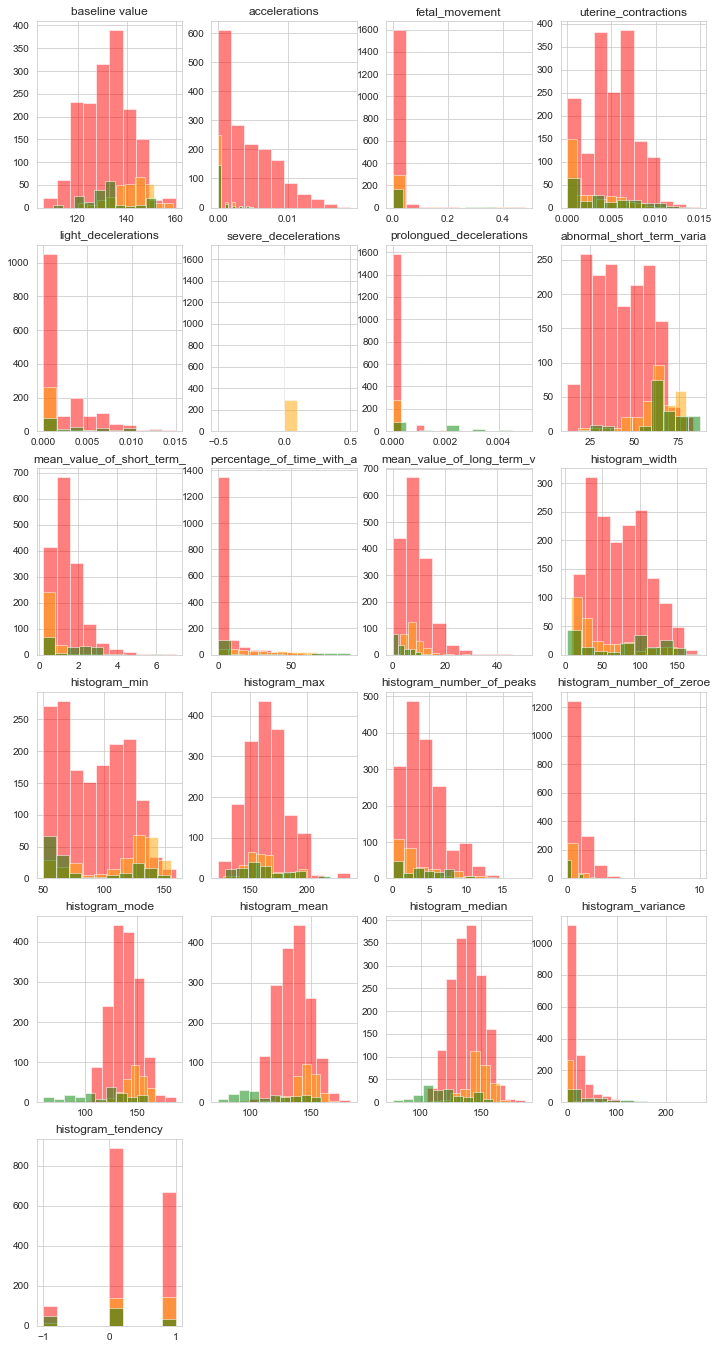

In [10]:
# plots of distribution for each column with skewness annotation
df_feature=df.columns[0:-1]

plt.figure(figsize=(12,24))
gs=gridspec.GridSpec(6,4)
for i, col in enumerate(df[df_feature]):
    ax=plt.subplot(gs[i])
    plt.hist(df[col][df.fetal_health==1], color='red', alpha=0.5)
    plt.hist(df[col][df.fetal_health==2], color='orange', alpha=0.5)
    plt.hist(df[col][df.fetal_health==3], color='Green', alpha=0.5)
    
    #ax.text(0.65,0.92,'skew:'+ str(round(skew(df[col]),2)), transform=ax.transAxes)
    ax.set_xlabel('')
    ax.set_title(str(col)[0:25])
plt.show()

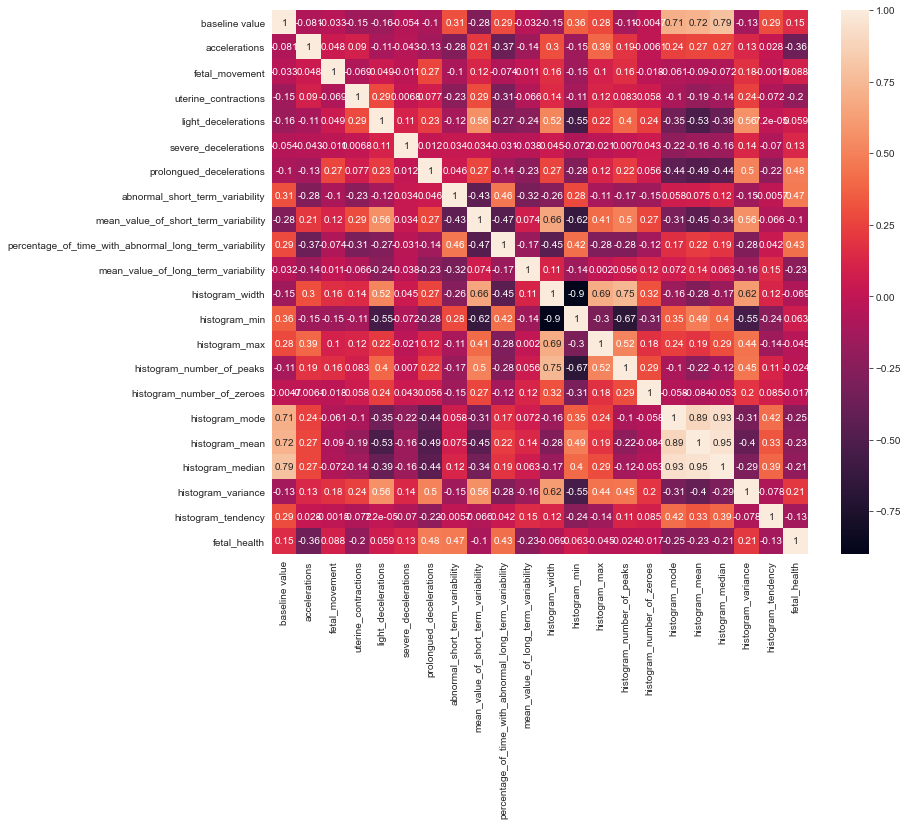

'\nhistogram_min, _mode, _median are intercorrelated each other. \nthey are also correlated with baseline value.\nhistogram_min is correlated with histogram_width\n\n'

In [11]:
# check correlalation each other
data=df[0:-1]
corrMatrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMatrix, annot=True)
#sns.set(font_scale=1)
plt.show()

'''
histogram_min, _mode, _median are intercorrelated each other. 
they are also correlated with baseline value.
histogram_min is correlated with histogram_width

'''

In [18]:
## Feature importance using RandomForest classifier

X, y=df.drop(['fetal_health'], axis=1), df.fetal_health

# Define the model
RF=RandomForestClassifier()

# Fit the model
RF.fit(X,y)

# Acquire importance
importance_RF=RF.feature_importances_

importance_RF=pd.DataFrame(importance_RF)
importance_RF.columns

RangeIndex(start=0, stop=1, step=1)

In [20]:
importance_RF.columns=['importance']
importance_RF['Feature']=list(X.columns)

In [21]:
importance_RF.sort_values('importance',ascending=False)

,importance,Feature
7,0.129103,abnormal_short_term_variability
8,0.128841,mean_value_of_short_term_variability
9,0.112272,percentage_of_time_with_abnormal_long_term_var...
17,0.096075,histogram_mean
6,0.052239,prolongued_decelerations
1,0.051677,accelerations
16,0.051585,histogram_mode
10,0.050762,mean_value_of_long_term_variability
18,0.050058,histogram_median
12,0.039852,histogram_min


Text(0, 0.5, 'Feature')

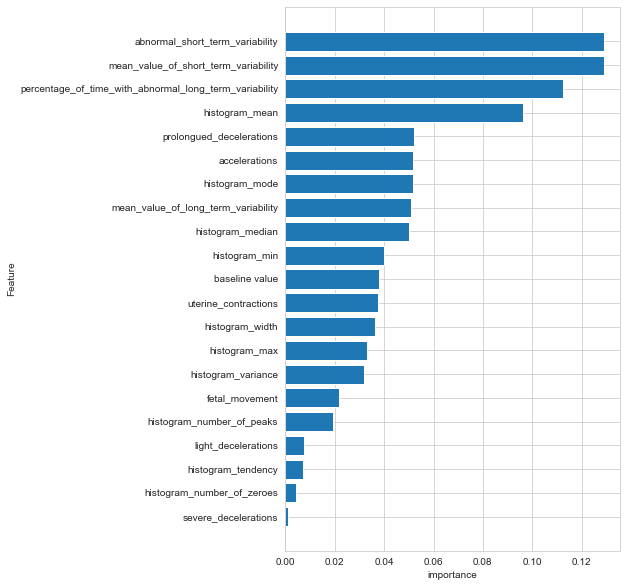

In [22]:
# bar plot of feature impoartance for each feature.

plt.figure(figsize=(6,10))

df_sorted=importance_RF.sort_values('importance',ascending=True)
plt.barh('Feature', 'importance',data=df_sorted)
plt.xlabel('importance')
plt.ylabel('Feature')

# decide not to discard any feature for now..

In [16]:
# scale the data
X=df.drop(['fetal_health'], axis=1)
y=df['fetal_health']

scaler = StandardScaler() # Create a StandardScaler() object
scaler.fit(X)
X_scaled=StandardScaler().fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns) #convert into dataframe
X_scaled_df.describe() # check scaled dataset

#split the data
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y,test_size=0.2,random_state=111)

In [17]:
#calculate class_weights for the imbalanced data
weight_class= class_weight.compute_class_weight('balanced',
                                                 np.unique(train_y),
                                                 train_y)
print(weight_class)
weight_class={1:0.4296184 ,2:2.36111111,3:4.01891253}

[0.42735043 2.43204578 4.01891253]


C:\Users\heyle\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[1. 2. 3.], y=45      1.0
1099    1.0
579     1.0
154     1.0
1442    1.0
       ... 
865     1.0
655     1.0
237     1.0
806     1.0
1709    1.0
Name: fetal_health, Length: 1700, dtype: float64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


## 3. Building models and evaluations

In [19]:

# Building four different models: SVM, Logistic regression, Randomforest, Gradient boosting
# using gridsearch method, proper parameters would be selected.

models_classification=[
   # set model and parameter grid
    {'model':SVC(class_weight=weight_class,random_state=111, probability=True,decision_function_shape='ovo'),
     'parameter_grid':{'C': [1, 5, 10, 15], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}},
    
    {'model':LogisticRegression(class_weight=weight_class, solver='liblinear',random_state=111),
     'parameter_grid':{'solver':['liblinear','saga','lbfgs']}},
    
    {'model':RandomForestClassifier(random_state=111, class_weight=weight_class),
     'parameter_grid':{'n_estimators':[100, 150, 200],'min_samples_split':[2,4,6], 'min_samples_leaf':[1,4]}},
    
    {'model':GradientBoostingClassifier(random_state=111),
     'parameter_grid':{'learning_rate':[0.1,0.01,0.001],'n_estimators':[100, 200]}}       
]

scoring={'f1_macro', 'f1_weighted'}  # set scroing method
model_summary=[]   # store all the model evaluation results into a list called model_summary


for model in models_classification: #pass through all the models classified above.

    model_method=type(model['model']).__name__

    print('********** ',model_method,' **********')   

    grid_search=GridSearchCV(estimator=model['model'], param_grid=model['parameter_grid'], scoring=scoring,
                            refit='f1_macro', n_jobs=-2)  

    grid_search.fit(train_X, train_y)  # fit the model
     
    best_parameters=grid_search.best_params_   # store the best parameters
    print('best_parameter: ', best_parameters)
    
    best_estimators=grid_search.best_estimator_   # store the best estimators
    print(best_estimators)
    
    predict=best_estimators.predict(test_X)    # predict on test set
    
    f1_macro=f1_score(test_y, predict, average='macro') # average of f1-score for all the classes 
    f1_micro=f1_score(test_y, predict, average='micro') # should be equivalant with accuracy
    f1_weighted=f1_score(test_y, predict, average='weighted')  # weighted f1-score which considers the ratio of class
    
    cfm=confusion_matrix(test_y,predict)  
    
    print('confusion_matrix', end='\n')
    print(cfm)
    print('\n')
    
    c_report=classification_report(test_y,predict)
    print('classification_report', end='\n')
    print(c_report)
    print('\n')
    
    # gather cross validation score where cv=5
    cv_f1_macro = cross_val_score(best_estimators, X_scaled, y, cv=5, scoring='f1_macro')
    cv_f1_micro = cross_val_score(best_estimators, X_scaled, y, cv=5, scoring='f1_micro')
    cv_f1_weighted = cross_val_score(best_estimators, X_scaled, y, cv=5, scoring='f1_weighted')
    cv_accuracy=cross_val_score(best_estimators, X_scaled, y, cv=5, scoring='accuracy')
    
    
    model_summary.append({'model_method':model_method,'best_params':best_parameters,'best_estimators':best_estimators,
                    'confusion_matrix':cfm,'classification_report':c_report,'cv_accuracy':cv_accuracy,
                          'cv_f1_macro':cv_f1_macro,'cv_f1_micro':cv_f1_micro,'cv_f1_weighted':cv_f1_weighted})

**********  SVC  **********
best_parameter:  {'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=15, class_weight={1: 0.4296184, 2: 2.36111111, 3: 4.01891253},
    decision_function_shape='ovo', gamma=0.1, probability=True,
    random_state=111)
confusion_matrix
[[311  16   2]
 [ 12  49   1]
 [  4   1  30]]


classification_report
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       329
         2.0       0.74      0.79      0.77        62
         3.0       0.91      0.86      0.88        35

    accuracy                           0.92       426
   macro avg       0.87      0.86      0.87       426
weighted avg       0.92      0.92      0.92       426



**********  LogisticRegression  **********
best_parameter:  {'solver': 'liblinear'}
LogisticRegression(class_weight={1: 0.4296184, 2: 2.36111111, 3: 4.01891253},
                   random_state=111, solver='liblinear')
confusion_matrix
[[303  21   5]
 [ 13  44   5]
 [  1   4  30]]


class

In [ ]:
'''
Based on the evaluation metrics above, gradient boosing shows the best result.
'''

In [ ]:
model_summary

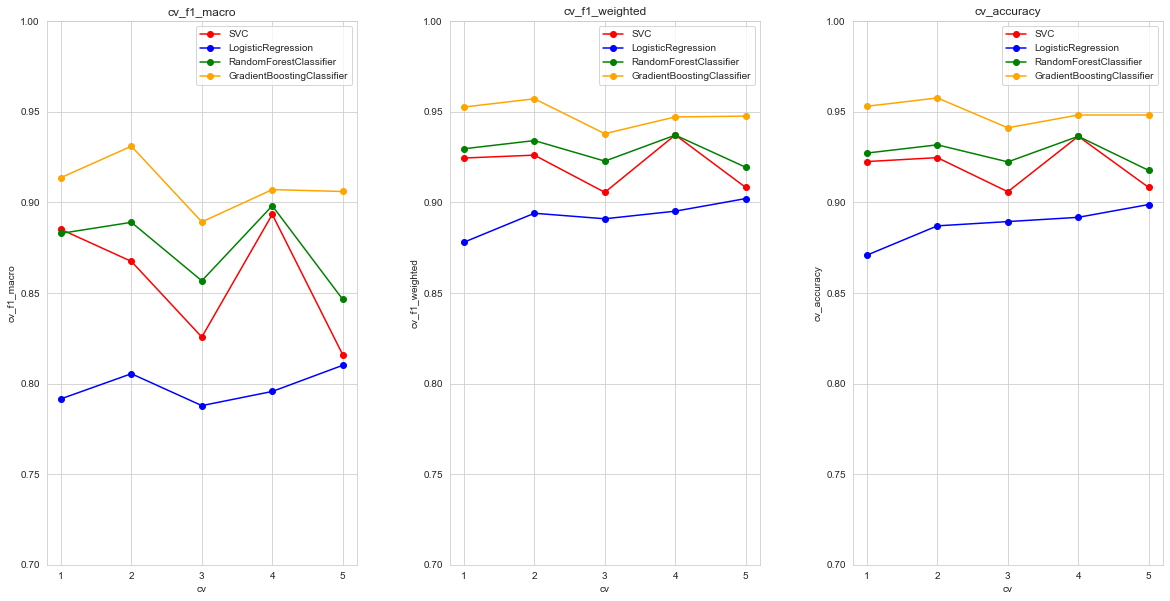

In [21]:
# Let's look at the results of cross validation where cv=5 for f1_macro, weighted, and accuracy

x=np.arange(1,6,1)
color=['red','blue','green','orange']

fig, axs=plt.subplots(1,3, figsize=(20,10))
fig.subplots_adjust(wspace=.3)

# Three metrics was chosen. Since dataset is imbalanced, accuracy itself might not represent
# the model evaluation results. f1_socre needs to be taken into account. 
# f1_macro : (f1_score_class1 +f1_score_class2+f1_score_class3)/3  
# f1_weighted : (f1_score_class1*class1_ratio +f1_score_class2*class2_ratio+f1_score_class3*class3_ratio)/3
metrics=['cv_f1_macro','cv_f1_weighted','cv_accuracy']

axs=axs.ravel()
for i in range(3): # 3 metrics
    for j in range(4): # 4 clssification methods
        axs[i].plot(x,model_summary[j][metrics[i]], color=color[j], marker='o', linestyle='solid', label=model_summary[j]['model_method'] )
        axs[i].legend()
        axs[i].set_title(metrics[i])
        axs[i].set_xlabel('cv')
        axs[i].set_ylabel(metrics[i])
        axs[i].set_yticks(np.arange(0.7, 1, 0.05))
plt.rcParams.update({'font.size': 14})   

##-> Based on the results, gradient boosting shows the best result with f1_macro 0.92 in average.